#ID0205 - Geometría Computacional

### Primavera 2023

### ID0205_Lab-3.07

**Profesor Enrique Naredo García**

<font size = 2> 
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Queda prohibido compartir este documento entre otros estudiantes, aún siendo de la misma clase, grupo o de la Universidad sin consentimiento del autor. Queda prohibida la reproducción total o parcial de este documento por cualquier medio o procedimiento, ya sea electrónico o mecánico, el tratamiento informático, el alquiler o cualquier otra forma de cesión sin la autorización previa y por escrito del titular del copyright.*
</font>

## Generación de gráficos de conglomerados

Este ejemplo muestra cómo encontrar las comunidades en un gráfico, luego contraer cada comunidad en un solo nodo usando la calse:`igraph.clustering.VertexClustering`. 

* En este ejemplo utilizamos la *Red de Los Miserables de Donald Knuth*, que muestra las apariencias de los personajes de la novela *Los Miserables*, aquí esta el [enlace](http://www-personal.umich.edu/~mejn/netdata/).

In [1]:
# iinstal igraph
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.9 MB/s eta 0:00:00


In [2]:
# importa librerías
import igraph as ig
import matplotlib.pyplot as plt
%matplotlib inline

Comenzamos descargando [aquí](http://www-personal.umich.edu/~mejn/netdata/) el archivo 'lesmis.gml' que contiene esta red.

* Puedes descargar este archivo en tu disco local.
* Se tiene que guardar el archivo en tu Google drive.
* Puedes abrir el folder que se muestra a la izquierda de este notebook.
* Ahí encontrarás un folder nombrado: 'sample_data'
* Podrías arrastrar y soltar el archivo 'lesmis.gml' en el folder 'sample_data'.
* Ya que lo tengas en este folder, usa el cursor (flecha) y aparecerá del lado derecho 3 puntos, da clic en 'Copy path' (o en español 'Copia ruta').
* finalmente copia esa ruta como se muestra en la siguiente celda.

In [4]:
# aquí copia la ruta para encontrar el archivo en tu drive
g = ig.load("/content/sample_data/lesmis.gml") 

Con este archivo podemos generar comunidades usando `igraph.Graph.community_edge_ betweenness` para separar los vértices en grupos. 


In [5]:
# generar comunidades
communities = g.community_edge_betweenness()

Para parcelas, es conveniente convertir las comunidades en un VertexClustering:



In [6]:
# convertir las comunidades en un VertexClustering
communities = communities.as_clustering()

También podemos imprimir fácilmente quién pertenece a cada comunidad.


In [7]:
# imprimir quién pertenece a cada comunidad
for i, community in enumerate(communities):
    print(f"Community {i}:")
    for v in community:
        print(f"\t{g.vs[v]['label']}")

Community 0:
	Myriel
	Napoleon
	MlleBaptistine
	MmeMagloire
	CountessDeLo
	Geborand
	Champtercier
	Cravatte
	Count
	OldMan
Community 1:
	Labarre
	Valjean
	MmeDeR
	Isabeau
	Gervais
	Bamatabois
	Simplice
	Scaufflaire
	Woman1
	Judge
	Champmathieu
	Brevet
	Chenildieu
	Cochepaille
Community 2:
	Marguerite
	Tholomyes
	Listolier
	Fameuil
	Blacheville
	Favourite
	Dahlia
	Zephine
	Fantine
	Perpetue
Community 3:
	MmeThenardier
	Thenardier
	Javert
	Pontmercy
	Eponine
	Anzelma
	Gueulemer
	Babet
	Claquesous
	Montparnasse
	Brujon
Community 4:
	Cosette
	Woman2
	Gillenormand
	Magnon
	MlleGillenormand
	MmePontmercy
	MlleVaubois
	LtGillenormand
	BaronessT
	Toussaint
Community 5:
	Fauchelevent
	MotherInnocent
	Gribier
Community 6:
	Boulatruelle
Community 7:
	Jondrette
	MmeBurgon
Community 8:
	Gavroche
	Marius
	Mabeuf
	Enjolras
	Combeferre
	Prouvaire
	Feuilly
	Courfeyrac
	Bahorel
	Bossuet
	Joly
	Grantaire
	MmeHucheloup
Community 9:
	MotherPlutarch
Community 10:
	Child1
	Child2


Finalmente, podemos proceder a trazar el gráfico. 

* Para que cada comunidad se destaque, establecemos los "colores de la comunidad" usando una paleta de 'igraph'.



In [14]:
# destacar comunidades con colores
num_communities = len(communities)
palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

Podemos usar un truco (no tan bueno) para mover las etiquetas debajo de los vértices.


In [ ]:
# mover las etiquetas debajo de los vértices
g.vs["label"] = ["\n\n" + label for label in g.vs["label"]]

Finalmente, podemos graficar las comunidades:


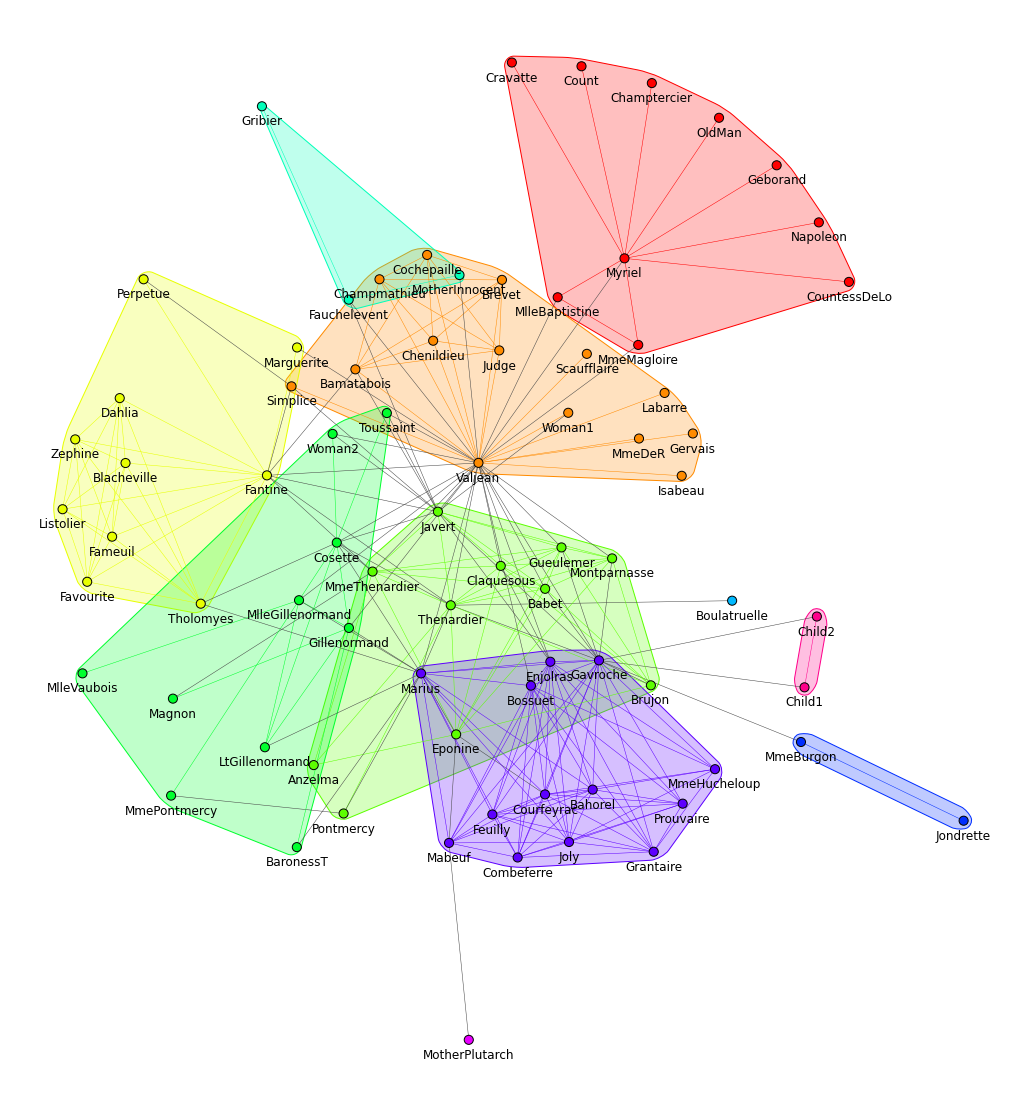

In [ ]:
# Graficar las comunidades
fig1, ax1 = plt.subplots()
ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=0.1,
    edge_width=0.5,
)
fig1.set_size_inches(20, 20)

Ahora intentemos reducir la información, usando un solo vértice para representar cada comunidad. 

* Comenzamos definiendo los atributos $x$, $y$, y el tamaño para cada nodo en el gráfico original:


In [8]:
# definir atributos x, y, y el tamaño de cada nodo
layout = g.layout_kamada_kawai()
g.vs["x"], g.vs["y"] = list(zip(*layout))
g.vs["size"] = 1
g.es["size"] = 1

Ahora, podemos generar el gráfico de clúster que comprime cada comunidad en un solo vértice.

In [11]:
# generar el gráfico de clúster
cluster_graph = communities.cluster_graph(
    combine_vertices={
        "x": "mean",
        "y": "mean",
        "color": "first",
        "size": "sum",
    },
    combine_edges={
        "size": "sum",
    },
)

* Tomamos la media de los valores de $x$ e $y$ para que los nodos en el gráfico de conglomerados se coloquen en el centroide del conglomerado original.


* También podemos definir funciones propias de contracción personalizadas, que tomen una lista y devuelvan un solo elemento que representa el valor del atributo combinado.



Finalmente, podemos asignar colores a los conglomerados y trazar el gráfico de conglomerados, incluyendo una leyenda para aclarar las cosas.


In [12]:
palette2 = ig.GradientPalette("gainsboro", "black")
g.es["color"] = [palette2.get(int(i)) for i in ig.rescale(cluster_graph.es["size"], (0, 255), clamp=True)]


<AxesSubplot:>

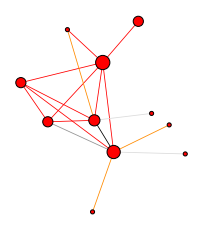

In [15]:
# Crea la figura
fig2, ax2 = plt.subplots()
ig.plot(
    cluster_graph,
    target=ax2,
    palette=palette1,
    # set a minimum size on vertex_size, otherwise vertices are too small
    vertex_size=[max(0.2, size / 20) for size in cluster_graph.vs["size"]],
    edge_color=g.es["color"],
    edge_width=0.8,
)


In [16]:
# Agrega una leyenda
legend_handles = []

for i in range(num_communities):
    handle = ax2.scatter(
        [], [],
        s=100,
        facecolor=palette1.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)

ax2.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax2.transAxes,
)

fig2.set_size_inches(10, 10)

###Ejercicio

Utiliza uno de los archivos que vienen en este [link](http://www-personal.umich.edu/~mejn/netdata/) para replicar el ejemplo anterior.

* Utiliza diferentes colores.
* Utiliza un titulo descriptivo del problema que abordas.
* Cambia el nombre de la mayor parte de código que puedas.
* Renombra variables en español.
* Recuerda agregar una introducción al principio describiendo el archivo escogido y el problema de cual se trata.
* Agreguen al final una sección de conclusiones
y referencias.